<a href="https://colab.research.google.com/github/ErikaNigrinis/TalentoTech/blob/main/Ingest_Data_Weather(API).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Se importan las librerias
import requests
import json
import pandas as pd

In [2]:
API_KEY = '4618c9773a801223a389eda03bca1307'  # Reemplazar con tu API Key de OpenWeather
ciudad = 'Bogotá'
#id_city = '3688689'
#url = f'https://api.openweathermap.org/data/2.5/weather?id={id_city}&appid={API_KEY}&units=metric'
url = f'http://api.openweathermap.org/data/2.5/weather?q={ciudad}&appid={API_KEY}&units=metric'

In [3]:
respuesta = requests.get(url)

if respuesta.status_code == 200:
    datos = respuesta.json()
    if 'main' in datos and 'weather' in datos:
        temperatura_actual = datos['main']['temp']
        descripcion_clima = datos['weather'][0]['description']
        print(f'Temperatura actual en {ciudad}: {temperatura_actual}°C')
        #print(f'Temperatura actual en {id_city}: {temperatura_actual}°C')
        #print(f'Descripción del clima: {descripcion_clima}')
    else:
        print('Error: No se encontraron los datos esperados en la respuesta.')
else:
    print(f'Error: No se pudo obtener los datos del clima. Código de estado: {respuesta.status_code}')

Temperatura actual en Bogotá: 12.73°C


In [4]:
# Reemplazar con tu API Key de OpenWeather
API_KEY = '4618c9773a801223a389eda03bca1307'

# Lista de ciudades colombianas
ciudades = ['Bogota', 'Medellin', 'Cali', 'Barranquilla', 'Cartagena', 'Cúcuta', 'Bucaramanga', 'Pereira', 'Santa Marta', 'Ibagué']

# Lista para almacenar los datos de temperatura
datos_temperatura = []

for ciudad in ciudades:
    url = f'http://api.openweathermap.org/data/2.5/weather?q={ciudad},CO&appid={API_KEY}&units=metric'
    respuesta = requests.get(url)

    if respuesta.status_code == 200:
        datos = respuesta.json()
        if 'main' in datos:
            temperatura_actual = datos['main']['temp']
            datos_temperatura.append({'Ciudad': ciudad, 'Temperatura': temperatura_actual})
        else:
            print(f'Error: No se encontraron los datos de temperatura para {ciudad}.')
    else:
        print(f'Error: No se pudo obtener los datos del clima para {ciudad}. Código de estado: {respuesta.status_code}')

# Crear un DataFrame de Pandas con los datos de temperatura
df_temperatura = pd.DataFrame(datos_temperatura)

print(df_temperatura)

         Ciudad  Temperatura
0        Bogota        12.73
1      Medellin        17.92
2          Cali        19.92
3  Barranquilla        27.88
4     Cartagena        26.79
5        Cúcuta        26.97
6   Bucaramanga        21.73
7       Pereira        15.52
8   Santa Marta        29.38
9        Ibagué        20.95


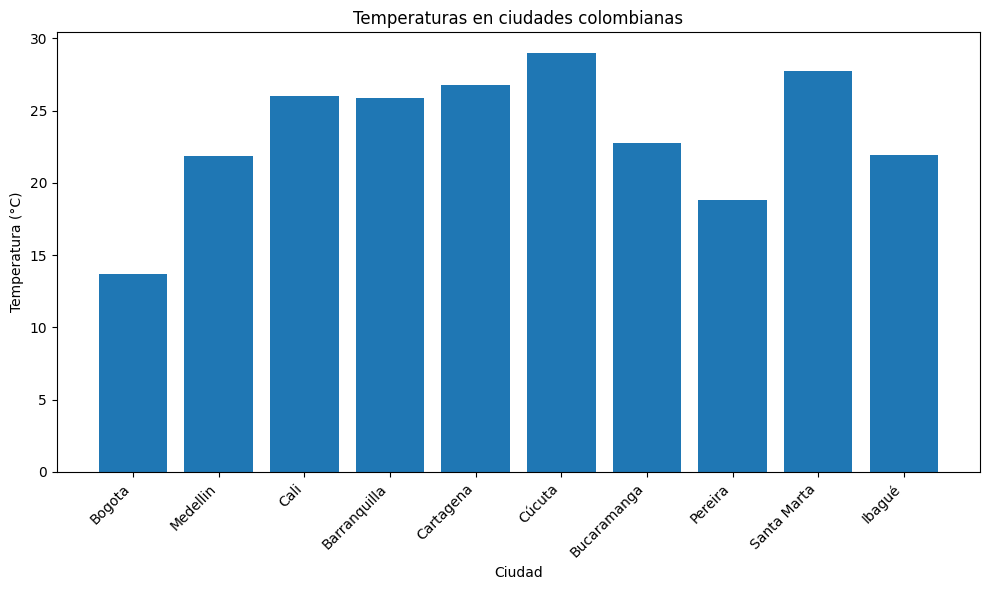

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(df_temperatura['Ciudad'], df_temperatura['Temperatura'])
plt.xlabel('Ciudad')
plt.ylabel('Temperatura (°C)')
plt.title('Temperaturas en ciudades colombianas')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

# EJERCICIO EN CLASE

In [ ]:
!pip install newsapi-python

In [ ]:
from newsapi import NewsApiClient

url = ('https://newsapi.org/v2/everything?'
       'q=bitcoin&'
       'sortBy=popularity&'
       'apiKey=064b1193ce1a45a584d3d07206fb22b6')

response = requests.get(url)

response_json = response.json()
# Crear un DataFrame de Pandas
df= pd.DataFrame(response_json)
df

,status,totalResults,articles
0,ok,6876,"{'source': {'id': None, 'name': '[Removed]'}, ..."
1,ok,6876,"{'source': {'id': 'wired', 'name': 'Wired'}, '..."
2,ok,6876,"{'source': {'id': 'wired', 'name': 'Wired'}, '..."
3,ok,6876,"{'source': {'id': 'wired', 'name': 'Wired'}, '..."
4,ok,6876,"{'source': {'id': None, 'name': 'Gizmodo.com'}..."
...,...,...,...
95,ok,6876,"{'source': {'id': None, 'name': 'Quartz India'..."
96,ok,6876,"{'source': {'id': None, 'name': 'Yahoo Enterta..."
97,ok,6876,"{'source': {'id': None, 'name': 'BBC News'}, '..."
98,ok,6876,"{'source': {'id': None, 'name': 'First Showing..."


In [ ]:
df2=df['articles'].apply(pd.Series)
df2

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': '[Removed]'}",None,[Removed],[Removed],https://removed.com,None,2024-09-17T13:00:22Z,[Removed]
1,"{'id': 'wired', 'name': 'Wired'}","Andy Greenberg, Lily Hay Newman, Dhruv Mehrotra",Iranian Hackers Tried to Give Hacked Trump Cam...,Plus: The FBI dismantles the largest-ever Chin...,https://www.wired.com/story/iran-hackers-trump...,https://media.wired.com/photos/66ed82cf42ad370...,2024-09-21T10:30:00Z,The week was dominated by news that thousands ...
2,"{'id': 'wired', 'name': 'Wired'}",Joel Khalili,Unmasking Bitcoin Creator Satoshi Nakamoto—Again,A new HBO documentary takes a swing at uncover...,https://www.wired.com/story/unmasking-bitcoin-...,https://media.wired.com/photos/6703eb3979f13fd...,2024-10-09T01:00:00Z,Peter Todd is standing on the upper floor of a...
3,"{'id': 'wired', 'name': 'Wired'}",Alistair Charlton,"Trump's $100,000 Watches Are the Most Tragic C...",Former president Donald Trump wants you to buy...,https://www.wired.com/story/trumps-dollar10000...,https://media.wired.com/photos/66f6c5b5c143415...,2024-09-27T17:48:08Z,Celebrities partnering with watch brands is no...
4,"{'id': None, 'name': 'Gizmodo.com'}",Matthew Gault,Controversial HBO Documentary Concludes Peter ...,The cryptocurrency community is not amused.,https://gizmodo.com/controversial-hbo-document...,https://gizmodo.com/app/uploads/2024/10/PeterT...,2024-10-09T14:05:37Z,"Last night, HBO aired a documentary about Bitc..."
...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'Quartz India'}",William Gavin,Mark Cuban says Donald Trump's billionaire tec...,Former President Donald Trump’s Silicon Valley...,https://qz.com/mark-cuban-donald-trump-silicon...,"https://i.kinja-img.com/image/upload/c_fill,h_...",2024-09-20T13:43:00Z,In This Story\r\nFormer President Donald Trump...
96,"{'id': None, 'name': 'Yahoo Entertainment'}",Olga Kharif and Stephanie Lai,"Trump Unveils Crypto Project, Says US Should D...",(Bloomberg) -- Donald Trump headlined an event...,https://finance.yahoo.com/news/trump-unveils-c...,https://s.yimg.com/cv/apiv2/social/images/yaho...,2024-09-17T02:43:49Z,(Bloomberg) -- Donald Trump headlined an event...
97,"{'id': None, 'name': 'BBC News'}",None,"I am not Bitcoin inventor, says man named in H...","The real identity of the person, known only as...",https://www.bbc.com/news/articles/c62m73my0dno,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-10-09T09:45:42Z,A new documentary claims to have solved the gr...
98,"{'id': None, 'name': 'First Showing'}",Alex Billington,Official Trailer for 'Money Electric: The Bitc...,"""If you dig deep enough, the inconsistencies w...",https://www.firstshowing.net/2024/official-tra...,https://media2.firstshowing.net/firstshowing/i...,2024-10-04T13:28:09Z,"by Alex BillingtonOctober 4, 2024Source:YouTub..."


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source       100 non-null    object
 1   author       93 non-null     object
 2   title        100 non-null    object
 3   description  99 non-null     object
 4   url          100 non-null    object
 5   urlToImage   96 non-null     object
 6   publishedAt  100 non-null    object
 7   content      100 non-null    object
dtypes: object(8)
memory usage: 6.4+ KB
